### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Exporting visualizations

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# disabling deprecation warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = "C:/Users/kevan/Documents/Career Foundry/Data Immersion/Achievement 6/Final Project"

In [5]:
# importing dataframe
df = pd.read_csv(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 6\Final Project\Data\Prepared Data\df_clean.csv', index_col = 0)

In [6]:
# setting max columns to see all in df

pd.set_option('display.max_columns', 50)

In [7]:
# setting max rows to see all in df

pd.set_option('display.max_rows', 160)

# 2. Data cleaning

In [8]:
# checking values in each column to decide which variables to use in regression analysis
# regression analysis requires continuous variables, so categorical variables will be removed

df.head()

,State,Year,Month,bbce,Income_Limit,bbce_assetlmt_eliminated,bbce_assetlmt_1kdollars,bbce_vehicle,bbce_household,bbce_senior_disabled,call_center,CAP_for_SSI,1to3_earn,4to6_earn,7to12_earn,13mo_earn,Average_Months_Certification,Median_Months_Certification,1to3_elderly,4to6_elderly,7to12_elderly,13mo_elderly,Average_Months_Elderly,Median_Months_Elderly,1to3_nonearn,4to6_nonearn,7to12_nonearn,13mo_nonearn,Average_Months_Nonearning,Median_Months_Nonearning,%dollar_EBT,Int_Face_Interview_Waiver,Recert_Face_Interview_Waiver,fingerprint,All_Elig_Noncitizen_Adult,Some_Elig_Noncitizen_Adult,All_Elig_Noncitizen_Child,Some_Elig_Noncitizen_Child,All_Elig_Noncitizen_Elderly,Some_Elig_Noncitizen_Elderly,Online_Application,outreach_spend,Simple_Reporting_Option,Transitional_Benefits,Exclude_All_Vehicles,High_Vehicle_Exemption,Exclude_OnePlus_Vehicles,EBT category,Fingerprint requirement
0,Alabama,1996,1,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.007937,0.080853,0.911210,0.0,11.313845,12.0,0.007576,0.046903,0.945521,0.0,11.633732,12.0,0.050756,0.360505,0.588739,0.0,9.023605,9.500000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
1,Alabama,1996,2,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.007937,0.074186,0.917877,0.0,11.373845,12.0,0.007576,0.047391,0.945034,0.0,11.630808,12.0,0.049486,0.351775,0.598739,0.0,9.120906,10.416667,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
2,Alabama,1996,3,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.005051,0.068414,0.926535,0.0,11.425072,12.0,0.007576,0.025168,0.967256,0.0,11.764141,12.0,0.050330,0.360387,0.589283,0.0,9.027948,10.416667,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
3,Alabama,1996,4,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.010259,0.075030,0.914711,0.0,11.350606,12.0,0.007576,0.016835,0.975589,0.0,11.830808,12.0,0.048053,0.358938,0.593009,0.0,9.115215,11.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required
4,Alabama,1996,5,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.010259,0.067784,0.921957,0.0,11.379592,12.0,0.000000,0.009259,0.990741,0.0,11.924837,12.0,0.041038,0.363640,0.595322,0.0,9.174034,11.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low EBT %,Not Required


In [9]:
# making column names shorter

df.rename(columns= {'bbce':'BBCE', '%dollar_EBT':'EBT Issuance', 'Int_Face_Interview_Waiver':'Initial Phone Interview', 'Recert_Face_Interview_Waiver':'Recertification Phone Interview', 'State_Name':'State', 'bbce_inclmt_%':'Income_Limit', '1to3mo_recert_%SNAP':'1to3_earn', '4to6mo_recert_%SNAP':'4to6_earn', '7to12mo_recert_%SNAP':'7to12_earn', '13mo_plus_recert_%SNAP':'13mo_earn', '%elderly_1to3mo_recert':'1to3_elderly', '%elderly_4to6mo_recert':'4to6_elderly', '%elderly_7to12mo_recert':'7to12_elderly', '%elderly_13moplus_recert':'13mo_elderly', '%nonearn_1to3mo_recert':'1to3_nonearn','%nonearn_4to6mo_recert':'4to6_nonearn','%nonearn_7to12mo_recert':'7to12_nonearn','%nonearn_13moplus_recert':'13mo_nonearn','Outreach_Spending_1kdollars':'outreach_spend'}, inplace = True)

In [10]:
# making a subset of variables to use in regression analysis

df_regression = df[['Year', 'Month', 'EBT Issuance', '1to3_earn', '4to6_earn', '7to12_earn', '13mo_earn', 'Average_Months_Certification', 'Median_Months_Certification', '1to3_elderly', '4to6_elderly', '7to12_elderly', '13mo_elderly', 'Average_Months_Elderly', 'Median_Months_Elderly', '1to3_nonearn', '4to6_nonearn', '7to12_nonearn', '13mo_nonearn', 'Average_Months_Nonearning', 'Median_Months_Nonearning', 'outreach_spend']]

In [11]:
df_regression.isnull().sum()

Year                              0
Month                             0
EBT Issuance                      0
1to3_earn                       153
4to6_earn                       153
7to12_earn                      153
13mo_earn                       153
Average_Months_Certification    153
Median_Months_Certification     153
1to3_elderly                    153
4to6_elderly                    153
7to12_elderly                   153
13mo_elderly                    153
Average_Months_Elderly          153
Median_Months_Elderly           153
1to3_nonearn                    153
4to6_nonearn                    153
7to12_nonearn                   153
13mo_nonearn                    153
Average_Months_Nonearning       153
Median_Months_Nonearning        153
outreach_spend                  153
dtype: int64

In [12]:
# dropping null values. null represent timepoints when data was not available.

df_regression.dropna(inplace=True)

In [13]:
df_regression.isnull().sum()

Year                            0
Month                           0
EBT Issuance                    0
1to3_earn                       0
4to6_earn                       0
7to12_earn                      0
13mo_earn                       0
Average_Months_Certification    0
Median_Months_Certification     0
1to3_elderly                    0
4to6_elderly                    0
7to12_elderly                   0
13mo_elderly                    0
Average_Months_Elderly          0
Median_Months_Elderly           0
1to3_nonearn                    0
4to6_nonearn                    0
7to12_nonearn                   0
13mo_nonearn                    0
Average_Months_Nonearning       0
Median_Months_Nonearning        0
outreach_spend                  0
dtype: int64

In [14]:
# no duplicates

dups = df_regression.duplicated()
dups.shape

(12699,)

# 3. Data prep for regression analysis

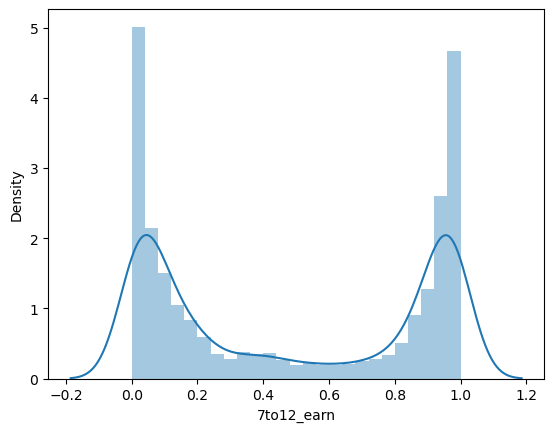

In [15]:
# plot histogram to check distribution of data

sns.distplot(df_regression['7to12_earn'], bins=25) # Shows extreme values
plt.show()

### Most values fall between 0 to 20% and 80% to 100%

In [16]:
df_regression['7to12_earn'].mean()

0.4846117505902827

In [17]:
df_regression['7to12_earn'].median()

0.399154589

In [18]:
df_regression['7to12_earn'].max()

1.0

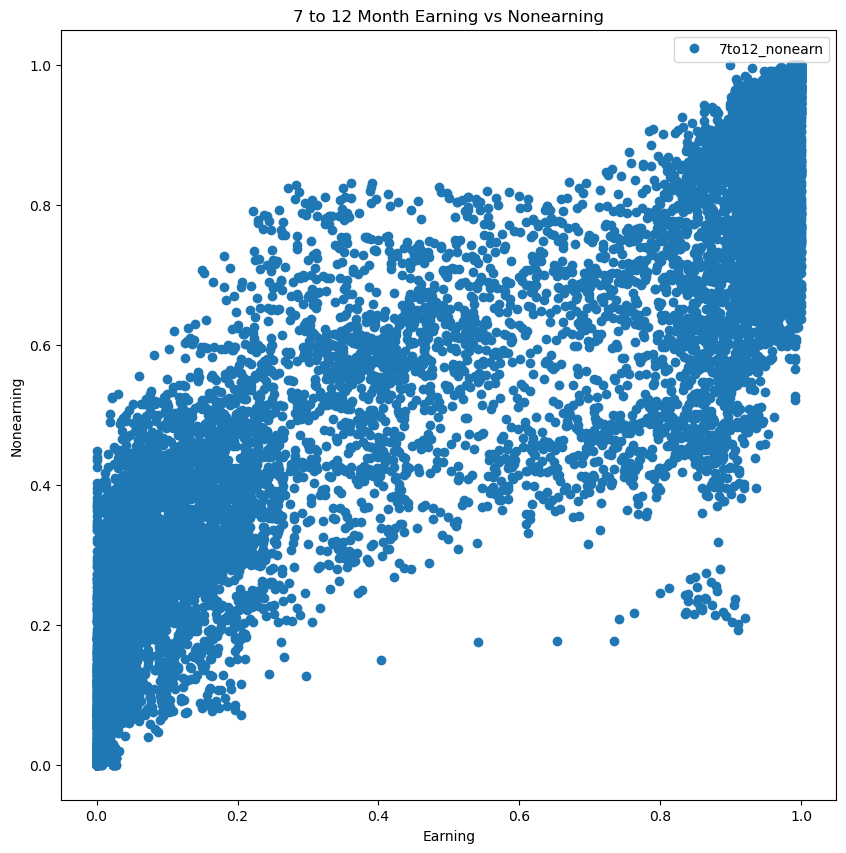

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_regression.plot(x = '7to12_earn', y='7to12_nonearn',style='o', figsize = [10,10]) # The style option creates a scatterplot; without it, we only have lines.
plt.title('7 to 12 Month Earning vs Nonearning')  
plt.xlabel('Earning')
plt.ylabel('Nonearning')
plt.show()

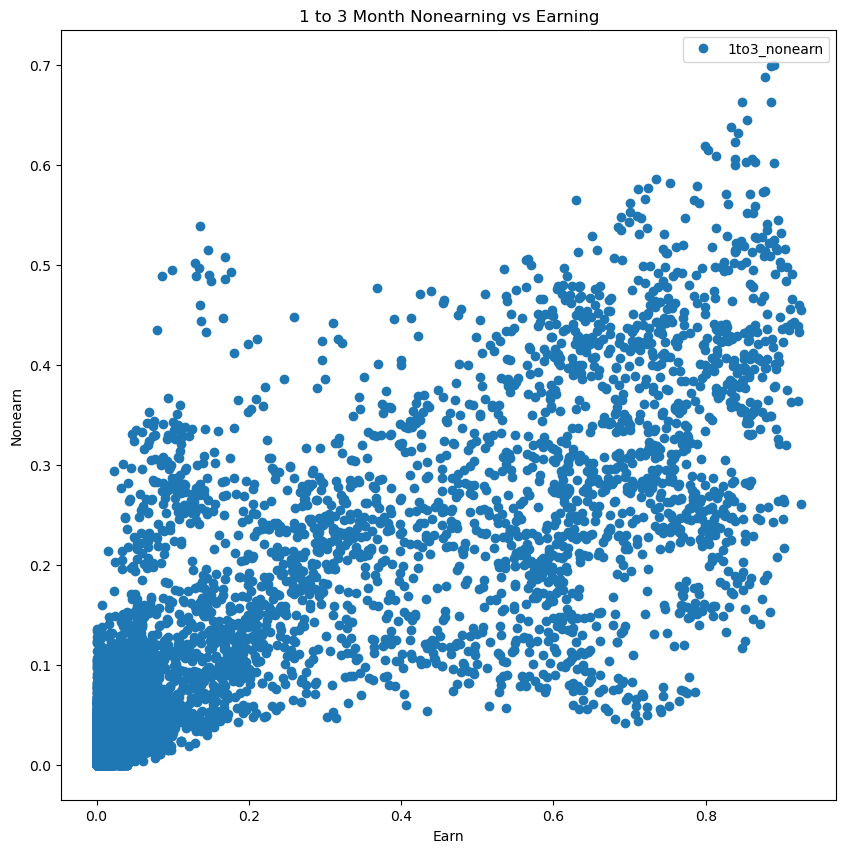

In [20]:
df_regression.plot(x = '1to3_earn', y='1to3_nonearn',style='o', figsize = [10,10])
plt.title('1 to 3 Month Nonearning vs Earning')  
plt.xlabel('Earn')  
plt.ylabel('Nonearn')  
plt.show()

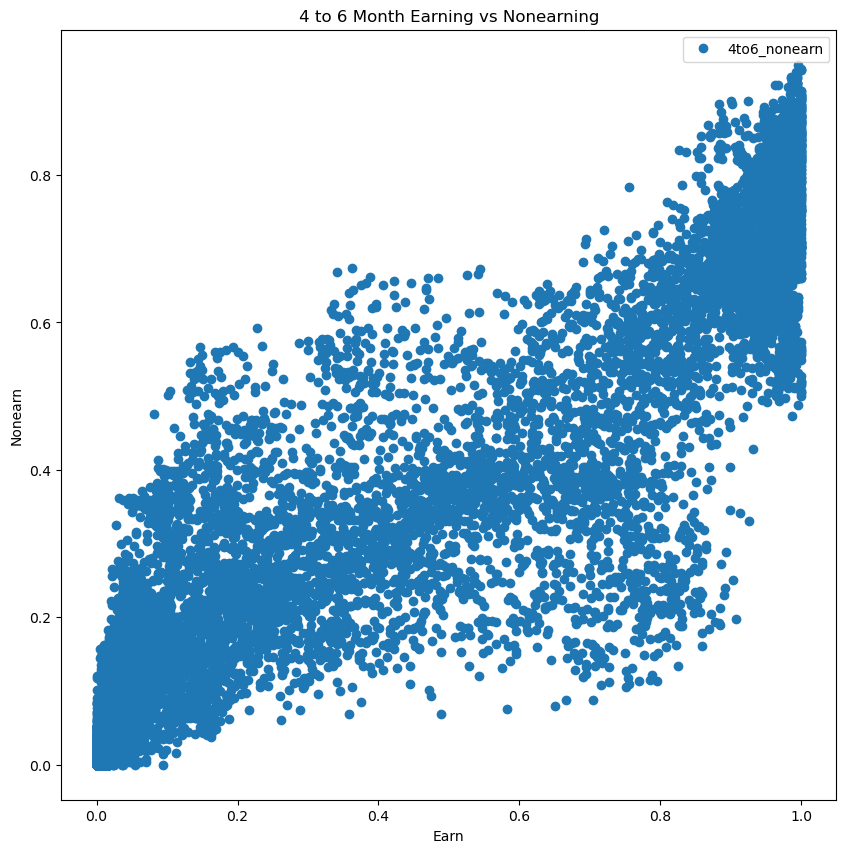

In [21]:
df_regression.plot(x = '4to6_earn', y='4to6_nonearn',style='o', figsize = [10,10]) 
plt.title('4 to 6 Month Earning vs Nonearning')  
plt.xlabel('Earn')  
plt.ylabel('Nonearn')  
plt.show()

### As earning proportions increase, so do nonearning proportions for 1 to 3, 4 to 6, and 7 to 12 month recertification periods.

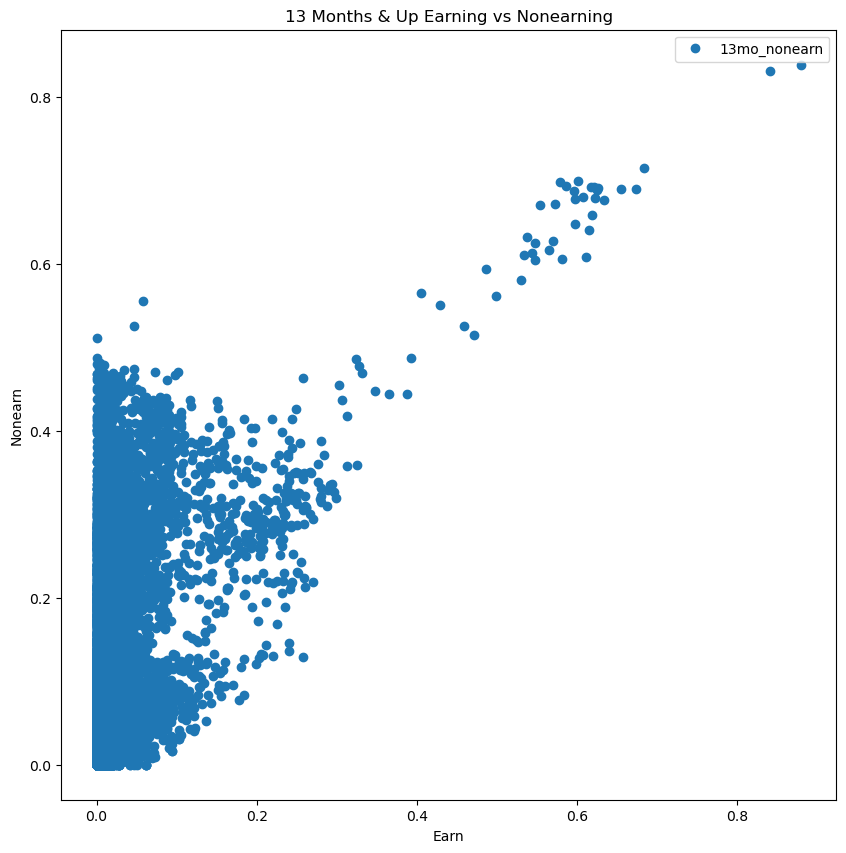

In [22]:
df_regression.plot(x = '13mo_earn', y='13mo_nonearn',style='o', figsize = [10,10])
plt.title('13 Months & Up Earning vs Nonearning')  
plt.xlabel('Earn')  
plt.ylabel('Nonearn')  
plt.show()

### Weak relationship for 13 and up month period for earning and nonearning.

### Hypothesis: Younger individuals (earning and non earning) have shorter recertification periods than elderly individuals. Nonearning proportions increase with earning proportions because these individuals may be children or other dependents within an earning individual's household.

# 4. Regression analysis

### 7 to 12 month recertification period chosen because it is most common for earning and nonearning recipients.

### Hypothesis: As earning proportions of earning individuals increase, so do proportions of nonearning individuals.

In [23]:
# Analyzing the relationship between proportions of nonearning and earning individuals with 1 to 3 month recertifications.
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_regression['7to12_nonearn'].values.reshape(-1,1)
y = df_regression['7to12_earn'].values.reshape(-1,1)

In [24]:
X

array([[0.58873881],
       [0.59873881],
       [0.58928254],
       ...,
       [0.02449412],
       [0.06515301],
       [0.06219207]])

In [25]:
y

array([[0.91121036],
       [0.91787703],
       [0.92653504],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X test values

y_predicted = regression.predict(X_test)

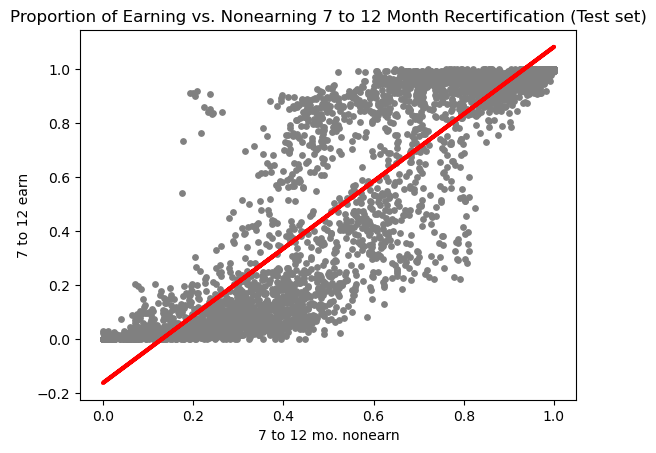

In [30]:
# Create a plot that shows the regression line from the model on the test set.
# the earning values are predicted using the nonearning test values

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Proportion of Earning vs. Nonearning 7 to 12 Month Recertification (Test set)')
plot_test.xlabel('7 to 12 mo. nonearn')
plot_test.ylabel('7 to 12 earn')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.2451302]]
Mean squared error:  0.03532647564350267
R2 score:  0.7891857095180324


### The mean squared error value reflects the data that is used. In this case, the data points are small numbers which explains the small MSE value. The R2 score is almost 79% which means that the model explains 79% of the variance within the data. This model is a good fit for this data.

In [33]:
y_predicted

array([[ 0.1857648 ],
       [ 0.23999715],
       [ 0.24827899],
       ...,
       [-0.04117593],
       [ 0.03283361],
       [ 0.30989773]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.060718,0.185765
1,0.093234,0.239997
2,0.114881,0.248279
3,0.167255,0.207559
4,0.966991,0.794917
5,0.651376,0.647353
6,0.518913,0.299691
7,0.177236,0.442691
8,0.047917,0.211240
9,0.845990,0.799323


In [35]:
# Predict y using X training values that model originally trained on

y_predicted_train = regression.predict(X_train)

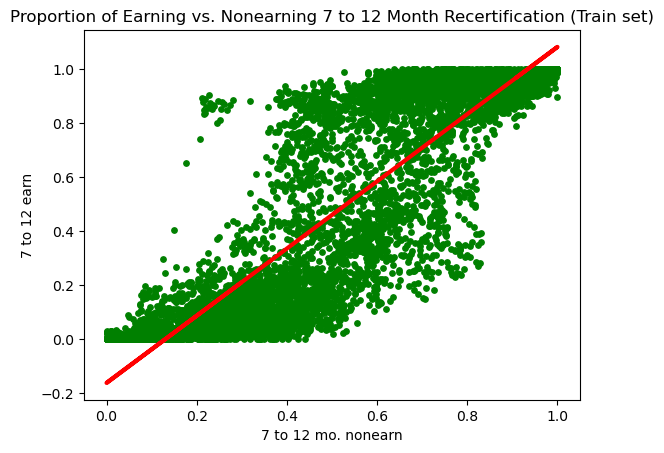

In [41]:
# Visualizing the training set results.

plot_test = plt
regression_train = plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Proportion of Earning vs. Nonearning 7 to 12 Month Recertification (Train set)')
plot_test.xlabel('7 to 12 mo. nonearn')
plot_test.ylabel('7 to 12 earn')
plot_test.show()

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.2451302]]
Mean squared error:  0.03394756985152198
R2 score:  0.7973077587461351


### The summary statistics improved after the model ran through the training data set, but not so much to suggest that the model is overfit. 

### I don't think there is any bias in this data because most of the data points are close to each other, so no outliers need to be removed. 

# 5. Exporting visualizations

In [42]:
regression_train.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'regression_train.png'))